Notebook para experimentar con el cálculo de la SNR de imágenes EL. Calcular la relación señal-ruido promedio SNR50 según lo definido por IEC NP 60904-13 necesita 2 imágenes EL de referencia y una imagen de fondo

In [1]:
# Importar librerías

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir, path

In [2]:
# Función para el cálculo de la relación señal a ruido (SNR) promedio SNR50

def SNR_IEC(i1, i2, ibg, allow_color_images=False):
    """
    Calculla la relación señal a ruido (SNR) promedio SNR50 según la norma IEC 60904-13

    Parámetros

    i1: numpy.ndarray
        Imagen de referencia
    i2: numpy.ndarray
        Imagen a comparar
    ibg: float
        Imagen del fondo
    allow_color_images: bool
        Permite el uso de imágenes a color

    Retorna

    snr50: float
        Relación señal a ruido (SNR) promedio SNR50
    """
    # Validar que las imágenes sean del tipo float64 (doble precisión):
    i1 = i1.astype(np.float64)
    i2 = i2.astype(np.float64)
    #i1 = np.asfarray(i1)
    #i2 = np.asfarray(i2)
    if np.any(ibg != 0):
        ibg = ibg.astype(np.float64)
        #ibg = np.asfarray(ibg)
        assert i1.shape == ibg.shape, "Las imágenes deben tener la misma resolución"
    # Validar que las imágenes tengan la misma resolución:
    if i1.shape != i2.shape:
        raise ValueError("Las imágenes deben tener la misma resolución")
    
    # Validar que las imágenes sean en escala de grises:
    if not allow_color_images:
        if len(i1.shape) == 3:
            raise ValueError("Las imágenes deben ser en escala de grises")
        
    # SNR definido por la norma IEC 60904-13
    signal = 0.5 * (i1 + i2) -ibg
    noise = 0.5**0.5 * np.abs(i1 - i2) * ((2 / np.pi)**0.5)
    signal = signal.sum()
    noise = noise.sum()

    snr50 = signal / noise

    return snr50
    

In [3]:
# Función para la lectura de imágenes

def read_images(directory, allow_color_images=False):
    """
    Lee todas las imágenes en un directorio

    Parámetros

    directory: str
        Directorio con las imágenes
    allow_color_images: bool
        Permite el uso de imágenes a color

    Retorna

    images: list
        Lista con las imágenes
    """
    # Leer todas las imágenes en el directorio
    images = []
    for f in listdir(directory):
        if f.endswith('.jpg') or f.endswith('.png'):
            image = cv2.imread(path.join(directory, f), cv2.IMREAD_GRAYSCALE)
            if allow_color_images:
                image = cv2.imread(path.join(directory, f), cv2.IMREAD_COLOR)
            images.append(image)
    return images

datasetEL = imágenes originales EL.  
datasetBG = imágenes originales del fondo.  
dataset_noBG = imágenes después de restar el fondo.  
datasetPP = imágenes después del preprocesado
image1_2Isc_path = imágenes con 1/2I_sc

In [28]:
# Ruta de las imágenes
image_path = "E:/Panel_30W/P13/V24.2_I2.50_t30/JPEG_8"
background_path ="E:/Panel_30W/P13/V24.2_I2.50_t30/fondo_8/JPEG_fondo_8"
No_background_path = "E:/Panel_30W/Salida13/P8/dataset_noBG"
imagePP_path = "E:/Panel_30W/Salida13/P8bg"
image1_2Isc_path = "E:/Panel_30W/P13/V22.1_I0.9_t27.973/JPEG"

datasetEL = read_images(image_path)
datasetBG = read_images(background_path)
dataset_noBG = read_images(No_background_path)
datasetPP = read_images(imagePP_path)

# Imprime el número de imágenes en cada dataset
# para probar que las imágenes se agregaron
print("Imágenes en el dataset EL: ", len(datasetEL))
print("Imágenes en el dataset BG: ", len(datasetBG))
print("Imágenes en el dataset noBG: ", len(dataset_noBG))
print("Imágenes en el dataset PP: ", len(datasetPP))

Imágenes en el dataset EL:  51
Imágenes en el dataset BG:  51
Imágenes en el dataset noBG:  51
Imágenes en el dataset PP:  5


In [8]:
# Cálculo de la SNR50

image1 = datasetEL[0]
image2 = datasetEL[1]
background_image = datasetBG[1]

# Calcular SNR con imagen de fondo
snr_background = SNR_IEC(image1, image2, background_image)
print("SNR con imagen de fondo:", snr_background)

SNR con imagen de fondo: 34.269107648428324


SNR promedio SNR50: 34.264843883940856


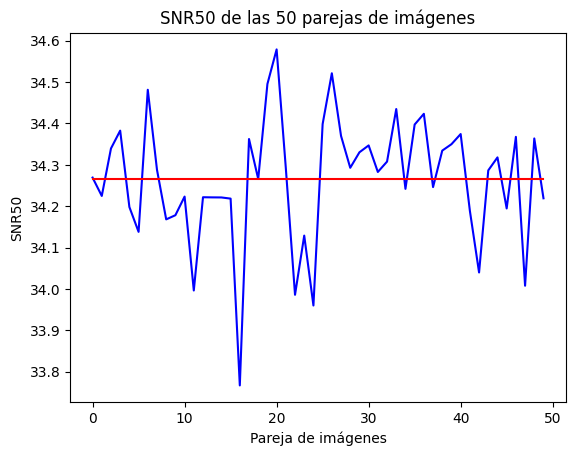

In [29]:
# Cálculo de la SNR50 de las 50 parejas de imágenes
snr50 = []
for i in range(0, 50):
    # print("Pareja de imágenes:", i)
    image1 = datasetEL[i]
    image2 = datasetEL[i+1]
    background_image = datasetBG[i+1]
    snr = SNR_IEC(image1, image2, background_image)
    snr50.append(snr)

print("SNR promedio SNR50:", np.mean(snr50))

# Gráfica de la SNR50 y el promedio de las 50 parejas de imágenes
plt.figure()
plt.plot(snr50, label="SNR50", color="blue")
plt.plot([np.mean(snr50)]*50, label="SNR50 promedio", color="red")
plt.xlabel("Pareja de imágenes")
plt.ylabel("SNR50")
plt.title("SNR50 de las 50 parejas de imágenes")
plt.show()



In [30]:
# Cálculo de la SNR de las 50 parejas de imágenes empleando la misma imagen de fondo
snr50_BG = []
for i in range(0, 50):
    # print("Pareja de imágenes:", i)
    image1 = datasetEL[i]
    image2 = datasetEL[i+1]
    background_image = datasetBG[1]
    snr = SNR_IEC(image1, image2, background_image)
    snr50_BG.append(snr)

print("SNR promedio SNR50 con la misma imagen de fondo:", np.mean(snr50_BG))

SNR promedio SNR50 con la misma imagen de fondo: 34.2978704370662


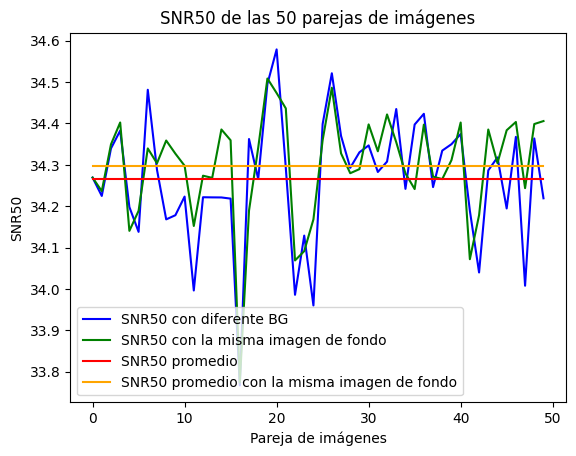

In [31]:
# Graficas de la SNR50 y el promedio cuando se emplean 50 imágenes de fondo diferentes y la misma imagen de fondo

plt.figure()
plt.plot(snr50, label="SNR50 con diferente BG", color="blue")
plt.plot(snr50_BG, label="SNR50 con la misma imagen de fondo", color="green")
plt.plot([np.mean(snr50)]*50, label="SNR50 promedio", color="red")
plt.plot([np.mean(snr50_BG)]*50, label="SNR50 promedio con la misma imagen de fondo", color="orange")
plt.xlabel("Pareja de imágenes")
plt.ylabel("SNR50")
plt.title("SNR50 de las 50 parejas de imágenes")
plt.legend()

Imágenes en el dataset 1/2Isc:  51
SNR promedio SNR50: 7.935259237458975


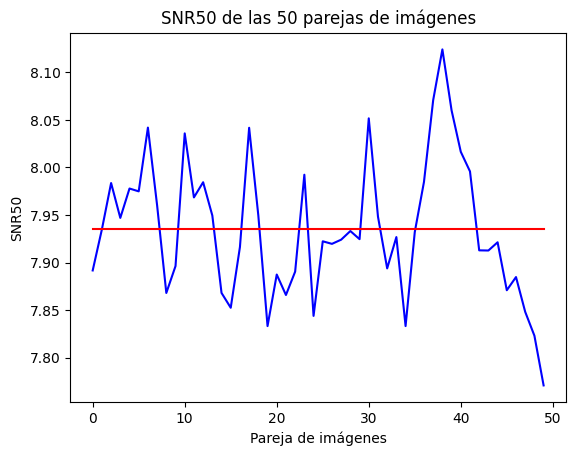

In [34]:
# Cálculo de la SNR50 de 50 parejas cuando se emplea 1/2Isc

dataset1_2Isc = read_images(image1_2Isc_path)
print("Imágenes en el dataset 1/2Isc: ", len(dataset1_2Isc))

# Cálculo de la SNR50 de las 50 parejas de imágenes
snr50_1_2Isc = []
for i in range(0, 50):
    # print("Pareja de imágenes:", i)
    image1 = dataset1_2Isc[i]
    image2 = dataset1_2Isc[i+1]
    background_image = datasetBG[i+1]
    snr = SNR_IEC(image1, image2, background_image)
    snr50_1_2Isc.append(snr)

print("SNR promedio SNR50:", np.mean(snr50_1_2Isc))

# Gráfica de la SNR50 y el promedio de las 50 parejas de imágenes
plt.figure()
plt.plot(snr50_1_2Isc, label="SNR50 cuando se usa la mitad de Isc", color="blue")
plt.plot([np.mean(snr50_1_2Isc)]*50, label="SNR50 promedio", color="red")
plt.xlabel("Pareja de imágenes")
plt.ylabel("SNR50")
plt.title("SNR50 de las 50 parejas de imágenes")
plt.show()

In [25]:
# imprimir los archivos en imagePP_path
print("Archivos en imagePP_path")
for f in listdir(imagePP_path):
    print(f)
    


Archivos en imagePP_path
V24.2_I2.50_t30_mediana.png
V24.2_I2.50_t30_media.png
V24.2_I2.50_t30_maxima.png
V24.2_I2.50_t30_minima.png
imagen_final_resaltada.png


SNR50 promedio de la imagen pre-procesada obtenida mediante la mediana: 5.161297433750354
SNR50 promedio de la imagen pre-procesada obtenida mediante la media: 5.208149537310767
SNR50 promedio de la imagen pre-procesada obtenida mediante la máxima: 3.898893418131548
SNR50 promedio de la imagen pre-procesada obtenida mediante la mínima: 6.916769529228368
SNR50 promedio de la imagen pre-procesada obtenida después de resaltar: 3.045926534345975


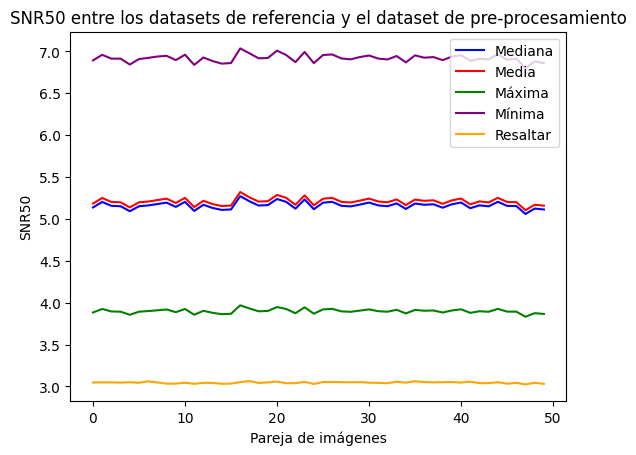

In [26]:
# Cálculo de la SNR50 entre los datasets de referencia y el dataset de pre-procesamiento
#snr50 = calculate_snr50(datasetEL, datasetPP, datasetBG)
snr50PP = []
for image2 in datasetPP:
    for i in range(len(datasetEL) -1):
        image1 = datasetEL[i+1]
        background_image = datasetBG[i+1]
        snr50PP.append(SNR_IEC(image1, image2, background_image))

# snr50PP tiene 250 elementos, los primero 50 corresponden a la imagen preprocesada obtenida mediante la mediana
# los siguientes 50 corresponden a la imagen preprocesada obtenida mediante la media
# los siguientes 50 corresponden a la imagen preprocesada obtenida mediante la máxima
# los siguientes 50 corresponden a la imagen preprocesada obtenida mediante la mínima
# los últimos 50 corresponden a la imagen preprocesada obtenida después de resaltar

snr_mediana = snr50PP[0:50]
snr_media = snr50PP[50:100]
snr_maxima = snr50PP[100:150]
snr_minima = snr50PP[150:200]
snr_resaltar = snr50PP[200:250]

# Imprimir el promedio de la SNR50 de cada dataset de pre-procesamiento
print("SNR50 promedio de la imagen pre-procesada obtenida mediante la mediana:", np.mean(snr_mediana))
print("SNR50 promedio de la imagen pre-procesada obtenida mediante la media:", np.mean(snr_media))
print("SNR50 promedio de la imagen pre-procesada obtenida mediante la máxima:", np.mean(snr_maxima))
print("SNR50 promedio de la imagen pre-procesada obtenida mediante la mínima:", np.mean(snr_minima))
print("SNR50 promedio de la imagen pre-procesada obtenida después de resaltar:", np.mean(snr_resaltar))



# Gráfica de la SNR50 entre los datasets de referencia y el dataset de pre-procesamiento
plt.figure()
plt.plot(snr_mediana, label="Mediana", color="blue")
plt.plot(snr_media, label="Media", color="red")
plt.plot(snr_maxima, label="Máxima", color="green")
plt.plot(snr_minima, label="Mínima", color="purple")
plt.plot(snr_resaltar, label="Resaltar", color="orange")
plt.xlabel("Pareja de imágenes")
plt.ylabel("SNR50")
plt.title("SNR50 entre los datasets de referencia y el dataset de pre-procesamiento")
plt.legend()
plt.show()

SNR promedio SNR50 sin imagen de fondo: 30.09346280953439


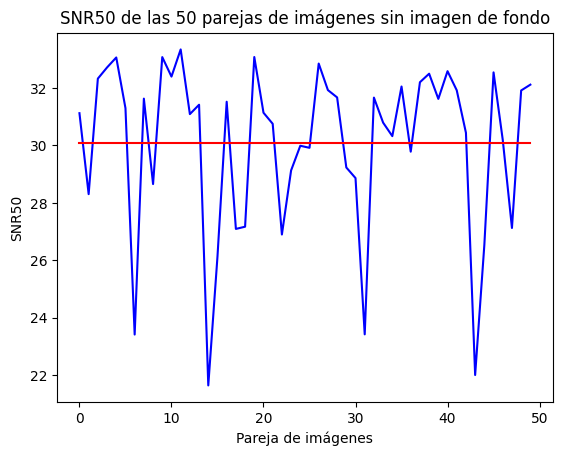

In [33]:
# Cálculo de la SNR50 de un dataset al que se le restó el fondo dataset_noBG
snr50_noBG = []
for i in range(0, 50):
    image1 = dataset_noBG[i]
    image2 = dataset_noBG[i+1]
    background_image = datasetBG[i+1]
    snr = SNR_IEC(image1, image2, background_image)
    snr50_noBG.append(snr)

print("SNR promedio SNR50 sin imagen de fondo:", np.mean(snr50_noBG))

# Gráfica de la SNR50 y el promedio de las 50 parejas de imágenes sin imagen de fondo
plt.figure()
plt.plot(snr50_noBG, label="SNR50", color="blue")
plt.plot([np.mean(snr50_noBG)]*50, label="SNR50 promedio", color="red")
plt.xlabel("Pareja de imágenes")
plt.ylabel("SNR50")
plt.title("SNR50 de las 50 parejas de imágenes sin imagen de fondo")
plt.show()

## Cálculo de la SNR para una imagen preprocesada a partir de 51 imágenes EL

En su caso, donde tiene 51 imágenes EL con las mismas características y ha obtenido una imagen preprocesada mediante el promedio, existen dos enfoques para calcular la SNR:

**1. SNR para la imagen preprocesada:**

* **Opción 1: Usar dos imágenes aleatorias:**
    * Puede seleccionar dos imágenes aleatorias de las 51 imágenes originales como imágenes de referencia (`i1` e `i2`) para calcular la SNR de la imagen preprocesada.
    * La imagen de fondo (`ibg`) puede ser la imagen capturada con la fuente de corriente apagada.
    * La SNR se calcularía utilizando la función `SNR_IEC` con las tres imágenes: la imagen preprocesada, una imagen aleatoria y la imagen de fondo.
    * Sin embargo, este método presenta cierta aleatoriedad, ya que el resultado de la SNR puede variar dependiendo de las dos imágenes aleatorias seleccionadas.

* **Opción 2: Usar la imagen preprocesada como referencia:**
    * En este caso, puede usar la imagen preprocesada como la imagen de referencia (`i1`) y repetir el proceso para obtener una segunda imagen preprocesada (`i2`).
    * La imagen de fondo (`ibg`) sigue siendo la imagen capturada con la fuente de corriente apagada.
    * La SNR se calcularía utilizando la función `SNR_IEC` con las tres imágenes: la imagen preprocesada original (`i1`), la nueva imagen preprocesada (`i2`) y la imagen de fondo.
    * Este método no tiene aleatoriedad, pero podría subestimar la SNR real, ya que la segunda imagen preprocesada (i2) no es una imagen EL independiente, sino una copia de la imagen preprocesada original (i1).

**2. SNR para las imágenes originales:**

* **Opción 1: Promediar las SNR de todas las imágenes:**
    * Puede calcular la SNR para cada par de imágenes originales (50 pares en total) utilizando la función `SNR_IEC`.
    * Luego, puede promediar todas las SNR calculadas para obtener una SNR representativa para el conjunto de imágenes originales.

* **Opción 2: Calcular la SNR con imágenes aleatorias:**
    * Al igual que en la opción 1 para la imagen preprocesada, puede seleccionar dos imágenes aleatorias de las 51 imágenes originales como imágenes de referencia (`i1` e `i2`) y calcular la SNR para cada par.
    * Repita este proceso un número significativo de veces (por ejemplo, 100 o 1000) y promedie las SNR calculadas para obtener una estimación más robusta del valor real.

**Consideraciones adicionales:**

* La elección del método dependerá de sus objetivos y de la información que desea obtener.
* Si es importante conocer la SNR de la imagen preprocesada en sí, la opción 1 o 2 del primer enfoque podrían ser adecuadas, siendo consciente de las limitaciones de cada una.
* Si desea tener una idea general de la SNR del conjunto de imágenes originales, la opción 1 o 2 del segundo enfoque podría ser más apropiada.
* Independientemente del método elegido, es importante documentar claramente la metodología utilizada para calcular la SNR.

**Recomendaciones:**

* Pruebe diferentes métodos y compare los resultados para evaluar cuál se ajusta mejor a sus necesidades.
* Considere el uso de herramientas de visualización de imágenes para analizar la calidad de las imágenes originales y preprocesadas.
* Si tiene dudas o necesita más información, consulte con un especialista en análisis de imágenes o procesamiento de señales.
